In [115]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np
fname = "data_test.root"
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")
print(events.metadata)
print(events)

done
{'version': 'latest'}
[<event 1:166:24590>, <event 1:166:24593>, ... <event 1:495:73743>]


In [34]:
taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
counts = ak.num(taus)
taus = ak.flatten(taus)
taus_lastcopy = taus.hasFlags(['isLastCopy'])
taus_from_HNL = abs(taus.distinctParent.pdgId) == 9900012
taus_from_W =  abs(taus.distinctParent.pdgId) ==24  #from HNL
sel_taus_from_signal = (taus_from_HNL | taus_from_W ) & taus_lastcopy
print(sel_taus_from_signal)
sel_taus_from_signal = ak.unflatten(sel_taus_from_signal, counts)
print(sel_taus_from_signal)

print(counts)
t = events.Tau
print(ak.num(t))
#taus_from_signal = t[sel_taus_from_signal]





[False, False, False, False, True, False, ... False, False, False, False, True, True]
[[False, False, False, False, True, False, ... False, False, False, True, True]]
[6, 5, 4, 4, 4, 5, 4, 4, 6, 4, 5, 4, 3, 4, ... 3, 4, 4, 3, 6, 4, 5, 4, 4, 4, 4, 4, 6]
[4, 3, 3, 1, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, ... 1, 3, 2, 3, 2, 2, 1, 3, 1, 3, 2, 2, 3]


In [1]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass

import numpy as np
fname = "data_test.root"
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")
nb_events = len(events)
print(nb_events)
t_rec = 0
t_in_genpart = 0
pt_from_HNL = []
pt_from_other = []
pt_from_W = []
deltar = []
pt_sum = []
i = 0
for event in events:
    i = i+1
    if(i%1000 == 0):
        print(str(i)+"/"+str(nb_events))
    electrons = event.Electron[(event.Electron.pt > 20.) & (event.Electron.mvaFall17V2Iso_WP90 > 0.5)]

    muons = event.Muon[(event.Muon.pt > 24.) & (event.Muon.mediumPromptId) & (event.Muon.pfRelIso03_all < 0.2) & (np.abs(event.Muon.dxy) < 0.005)]

    taus = event.Tau[(event.Tau.pt > 20.) & (event.Tau.idDeepTau2017v2p1VSmu > 0.5) & (event.Tau.idDeepTau2017v2p1VSe > 0.5) & (event.Tau.idDeepTau2017v2p1VSjet >2)]
    p1 = None
    p1_catched = False
    p2_catched = False
    p2 = None
    g = event.GenPart
    for e in electrons:
        idx = e.genPartIdx
        match = False
        if(idx >=0 and idx < len(g)):
            curr = g[idx]
            if(abs(curr.pdgId) == 11):
                if(abs(curr.distinctParent.pdgId) == 15):
                    if(curr.distinctParent.distinctParent.pdgId == 9900012):
                        p1 = e
                        p1_catched = True
                        match = True
                if(abs(curr.distinctParent.pdgId) ==24 ):
                    if(curr.distinctParent.distinctParent.pdgId == 9900012):
                        p2 = e
                        p2_catched = True
                        match = True
        if(match== False):
            pt_from_other.append(e.pt)
    for m in muons:
        idx = m.genPartIdx
        match = False
        if(idx >=0 and idx < len(g)):
            curr = g[idx]
            if(abs(curr.pdgId) == 13):
                if(abs(curr.distinctParent.pdgId) == 15):
                    if(curr.distinctParent.distinctParent.pdgId == 9900012):
                        p1 = m
                        p1_catched = True
                        match = True
                if(abs(curr.distinctParent.pdgId) ==24 ):
                    if(curr.distinctParent.distinctParent.pdgId == 9900012):
                        p2 = m  
                        p2_catched = True  
                        match = True  
        if(match== False):
            pt_from_other.append(m.pt)                            
    for t in taus:
        idx = t.genPartIdx
        match = False
        if(idx >=0 and idx < len(g)):
            curr = g[idx]
            if(abs(curr.pdgId) == 15 ):
                if(abs(curr.distinctParent.pdgId) ==9900012 ):
                    p1 = t
                    p1_catched = True
                    match = True
            if(abs(curr.distinctParent.pdgId) ==24 ):
                if(curr.distinctParent.distinctParent.pdgId == 9900012):
                    p2 = t
                    p2_catched = True
                    match = True
        if(match == False):
            pt_from_other.append(t.pt)                            
    if(p1_catched):
        pt_from_HNL.append(p1.pt)
    if(p2_catched):
        pt_from_W.append(p2.pt)    
    if(p1_catched & p2_catched):
        deltar.append(delta_r(p1,p2))
        pt_sum.append((p1+p2).pt)

done
17337
4
3
3
1
2
2
2
3
2
1
3
2
2
1
2
2
2
1
3
3
1
3
1
2
2
2
1
3
1
3
3
3
1
2
2
2
3
2
3
3
2
3
1
3
3
2
2
2
3
2
3
2


KeyboardInterrupt: 

In [95]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass

import numpy as np
fname = "data_test.root"
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")
nb_events = len(events)
print(nb_events)

i = 0

events['weight'] = events.genWeight
events['SelElectron'] = events.Electron[(events.Electron.pt > 20.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
events['SelMuon_sing'] = events.SelMuon[(~(match1))]  
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=3)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
events['SelTau_sing'] = events.SelTau[((~(match2) & ~(match3)) )]


events = events[ak.num(events.SelTau) + ak.num(events.SelElectron) + ak.num(events.SelMuon) >=3]


array_p_HNL_pt = []
array_p_W_pt = []
array_p_q_pt = []
array_p_HNL_W_pt = []
array_p_HNL_q_pt = []
array_p_W_q_pt = []
array_p_HNL_W_dr = []
array_p_HNL_q_dr = []
array_p_W_q_dr = []



iteration = 0
for event in events:
    if(iteration%10 == 0):
        print(str(iteration)+"/"+str(nb_events))
    iteration= iteration+1
    p_HNL_match = False
    p_W_match = False
    p_q_match = False
    p_HNL = 0
    p_W = 0
    p_q = 0
    g = event.GenPart
    v = event.GenVisTau
    for l in event.SelTau_sing:
        i = l.genPartIdx
        if(i < len(v)):
            print("Boby")
            print(v[i].parent.distinctParent.distinctParent.pdgId)
            parent = abs(v[i].parent.distinctParent.pdgId)
            if( parent== 9900012):
                p_HNL = l
                p_HNL_match = True
            if(parent == 24):
                p_W = l
                p_W_match = True
            if(parent <=6 or parent ==22 ):
                p_q = l
                p_q_match = True
    if(not(p_HNL_match and p_W_match and p_q_match)):
        for e in event.SelElectron:
            idx = e.genPartIdx
            if(idx >=0 and idx < len(g)):
                curr = g[idx]
                if(abs(curr.pdgId) == 11):
                    parent = abs(curr.distinctParent.pdgId)
                    gdp = abs(curr.distinctParent.distinctParent.pdgId) 
                    if(parent == 9900012):
                            p_HNL = e
                            p_HNL_match = True
                    if(parent==24 ):
                            p_W = e
                            p_W_match = True
                    if(gdp<=6 or gdp ==22):
                            p_q = e
                            p_q_match = True

        if(not(p_HNL_match and p_W_match and p_q_match)):
            for m in event.SelMuon_sing:
                idx = m.genPartIdx
                if(idx >=0 and idx < len(g)):
                    curr = g[idx]
                    if(abs(curr.pdgId) == 13):
                        parent = abs(curr.distinctParent.pdgId)
                        gdp = abs(curr.distinctParent.distinctParent.pdgId) 
                        if(parent == 9900012):
                                p_HNL = m
                                p_HNL_match = True
                        if(parent ==24 ):
                                p_W = m
                                p_W_match = True
                        if(gdp<=6 or gdp ==22):
                                p_q = m
                                p_q_match = True 

    if(p_q_match):
        array_p_q_pt.append(p_q)
    if(p_W_match):
        array_p_W_pt.append(p_W)
    if(p_HNL_match):
        array_p_HNL_pt.append(p_HNL)  
    if(p_W_match & p_HNL_match):
        array_p_HNL_W_dr.append(delta_r(p_HNL, p_W))
        array_p_HNL_W_pt.append((p_HNL+p_W).pt)
    if(p_q_match & p_HNL_match):
        array_p_HNL_q_dr.append(delta_r(p_HNL, p_q))
        array_p_HNL_q_pt.append((p_HNL+p_q).pt)    
    if(p_q_match & p_W_match):
        array_p_W_q_dr.append(delta_r(p_q, p_W))
        array_p_W_q_pt.append((p_W+p_q).pt)    



done
17337
0/17337
Boby
22
Boby
22
Boby
22
Boby
-2
Boby
22
Boby
22
Boby
-1
Boby
9900012
Boby
22
Boby
1
Boby
22
Boby
22
Boby
22
Boby
-2
10/17337
Boby
-2
Boby
22
Boby


KeyboardInterrupt: 

In [116]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass

import numpy as np
fname = "data_test.root"
fname = "C:\\Users\\lucas\\Desktop\\PDM\\data\\HeavyNeutrino_trilepton\\HeavyNeutrino_trilepton_VBF_M-1000_V-0p01_tau_NLO_tauhFilter_TuneCP5_13TeV-madgraph-pythia8\\0F0C9493-CF2D-9A40-A83E-CFA7BAAE28B2.root"
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")
nb_events = len(events)
print(nb_events)

events['weight'] = events.genWeight
events['SelElectron'] = events.Electron[(events.Electron.pt > 20.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
events['SelMuon_sing'] = events.SelMuon[(~(match1))]  
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
events['SelTau_sing'] = events.SelTau[((~(match2) & ~(match3)) )]


events = events[ak.num(events.SelTau) + ak.num(events.SelElectron) + ak.num(events.SelMuon) >=3]




events['Electron_from_q'] = events.SelElectron[abs(events.GenPart[events.SelElectron.genPartIdx].distinctParent.distinctParent.pdgId) <=6]
events['Electron_from_HNL'] = events.SelElectron[abs(events.GenPart[events.SelElectron.genPartIdx].distinctParent.pdgId) == 9900012]
events['Electron_from_W'] = events.SelElectron[abs(events.GenPart[events.SelElectron.genPartIdx].distinctParent.pdgId) == 24]

events['Muon_from_q'] = events.SelMuon_sing[abs(events.GenPart[events.SelMuon_sing.genPartIdx].distinctParent.distinctParent.pdgId) <=6]
events['Muon_from_HNL'] = events.SelMuon_sing[abs(events.GenPart[events.SelMuon_sing.genPartIdx].distinctParent.pdgId) == 9900012]
events['Muon_from_W'] = events.SelMuon_sing[abs(events.GenPart[events.SelMuon_sing.genPartIdx].distinctParent.pdgId) == 24]

events['SelTau_sing_plus'] = events.SelTau_sing[events.SelTau_sing.genPartIdx < ak.num(events.GenVisTau)]
events['Tau_from_HNL'] = events.SelTau_sing_plus[abs(events.GenVisTau[events.SelTau_sing_plus.genPartIdx].parent.distinctParent.pdgId) ==9900012 ]
events['Tau_from_q'] = events.SelTau_sing_plus[abs(events.GenVisTau[events.SelTau_sing_plus.genPartIdx].parent.distinctParent.pdgId) <=6 ]
events['Tau_from_W'] = events.SelTau_sing_plus[abs(events.GenVisTau[events.SelTau_sing_plus.genPartIdx].parent.distinctParent.pdgId) ==24 ]


events['lepton_from_HNL'] = ak.concatenate([events.Electron_from_HNL, events.Muon_from_HNL, events.Tau_from_HNL], axis = -1)
events['lepton_from_q'] = ak.concatenate([events.Electron_from_q, events.Muon_from_q, events.Tau_from_q], axis = -1)
events['lepton_from_W'] = ak.concatenate([events.Electron_from_W, events.Muon_from_W, events.Tau_from_W], axis = -1)


print(len(ak.flatten(events.lepton_from_HNL))) #######NOT ENOUGH TAUS FROM HNL????



events['dilepton_from_HNL_and_W'] = ak.concatenate([events.lepton_from_HNL, events.lepton_from_W], axis = -1)
events['dilepton_from_HNL_and_q'] = ak.concatenate([events.lepton_from_HNL, events.lepton_from_q], axis = -1)
events['dilepton_from_q_and_W'] = ak.concatenate([events.lepton_from_q, events.lepton_from_W], axis = -1)


dilepton_from_HNL_and_W_clean = events.dilepton_from_HNL_and_W[ak.num(events.dilepton_from_HNL_and_W) == 2]
dilepton_from_HNL_and_q_clean = events.dilepton_from_HNL_and_q[ak.num(events.dilepton_from_HNL_and_q) == 2]
dilepton_from_q_and_W_clean = events.dilepton_from_q_and_W[ak.num(events.dilepton_from_q_and_W) == 2]
dilepton_from_HNL_and_W_pt = (dilepton_from_HNL_and_W_clean[:,0] +dilepton_from_HNL_and_W_clean[:,1]).pt
dilepton_from_HNL_and_W_dr = delta_r(dilepton_from_HNL_and_W_clean[:,0] ,dilepton_from_HNL_and_W_clean[:,1])
dilepton_from_HNL_and_q_pt = (dilepton_from_HNL_and_q_clean[:,0] +dilepton_from_HNL_and_q_clean[:,1]).pt
dilepton_from_HNL_and_q_dr = delta_r(dilepton_from_HNL_and_q_clean[:,0] ,dilepton_from_HNL_and_q_clean[:,1])
dilepton_from_q_and_W_pt = (dilepton_from_q_and_W_clean[:,0] +dilepton_from_q_and_W_clean[:,1]).pt
dilepton_from_q_and_W_dr = delta_r(dilepton_from_q_and_W_clean[:,0] ,dilepton_from_q_and_W_clean[:,1])
lepton_from_HNL_pt = events.lepton_from_HNL.pt
lepton_from_W_pt = events.lepton_from_W.pt
lepton_from_q_pt = events.lepton_from_q.pt




done
9033
1737


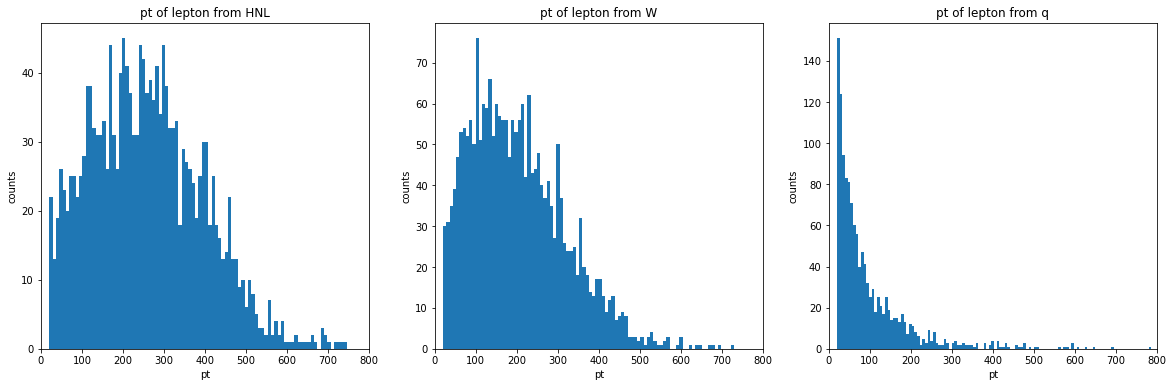

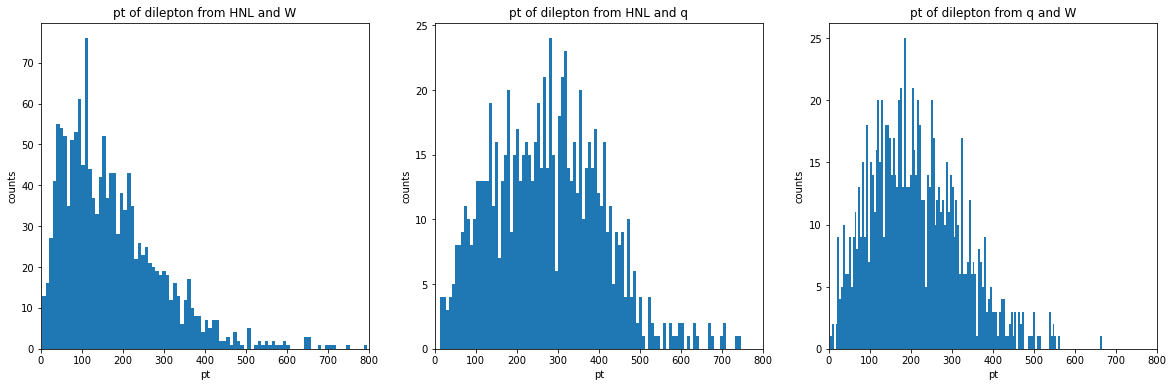

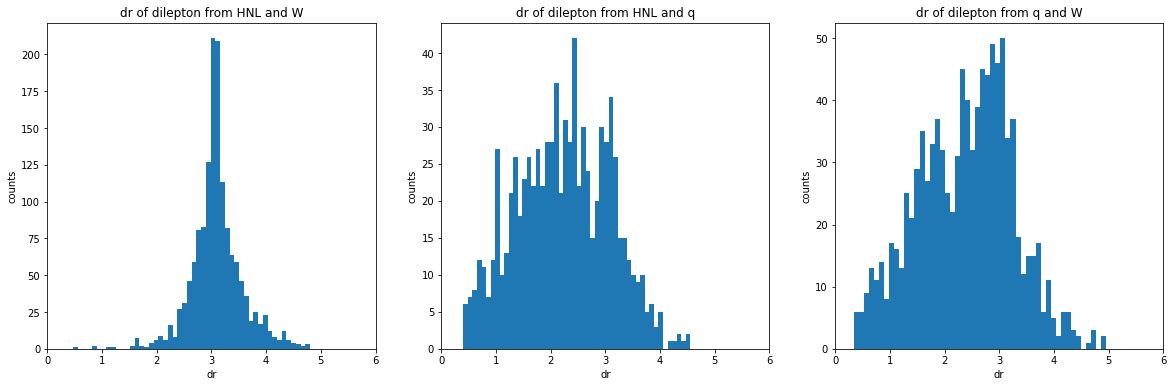

In [117]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mn = 0
mx = 800
lepton_from_q_pt_flat = ak.to_numpy(ak.flatten(lepton_from_q_pt, axis = None))
lepton_from_q_pt_flat = np.sort(lepton_from_q_pt_flat)
lepton_from_HNL_pt_flat = ak.flatten(lepton_from_HNL_pt)
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.hist(lepton_from_HNL_pt_flat, bins = 100)
plt.title("pt of lepton from HNL")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
lepton_from_W_pt_flat = ak.flatten(lepton_from_W_pt)
plt.subplot(1, 3, 2)

plt.hist(lepton_from_W_pt_flat, bins = 100)
plt.title("pt of lepton from W")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(1, 3, 3)

plt.hist(lepton_from_q_pt_flat, bins = 200)
plt.title("pt of lepton from q")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.show()

#################################################
mn = 0
mx = 800
dilepton_from_HNL_and_W_pt_flat = dilepton_from_HNL_and_W_pt
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.hist(dilepton_from_HNL_and_W_pt_flat, bins = 100)
plt.title("pt of dilepton from HNL and W")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
dilepton_from_HNL_and_q_pt_flat = dilepton_from_HNL_and_q_pt
plt.subplot(1, 3, 2)
plt.hist(dilepton_from_HNL_and_q_pt_flat, bins = 100)
plt.title("pt of dilepton from HNL and q")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
dilepton_from_q_and_W_pt_flat = dilepton_from_q_and_W_pt
plt.subplot(1, 3, 3)
plt.hist(dilepton_from_q_and_W_pt_flat, bins = 200)
plt.title("pt of dilepton from q and W")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.show()



#########################################
mn = 0
mx = 6
dilepton_from_HNL_and_W_dr_flat = dilepton_from_HNL_and_W_dr
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.hist(dilepton_from_HNL_and_W_dr_flat, bins = 50)
plt.title("dr of dilepton from HNL and W")
plt.xlabel('dr')
plt.ylabel('counts')
plt.xlim(mn, mx)
dilepton_from_HNL_and_q_dr_flat = dilepton_from_HNL_and_q_dr
plt.subplot(1, 3, 2)
plt.hist(dilepton_from_HNL_and_q_dr_flat, bins = 50)
plt.title("dr of dilepton from HNL and q")
plt.xlabel('dr')
plt.ylabel('counts')
plt.xlim(mn, mx)
dilepton_from_q_and_W_dr_flat = dilepton_from_q_and_W_dr
plt.subplot(1, 3, 3)
plt.hist(dilepton_from_q_and_W_dr_flat, bins = 50)
plt.title("dr of dilepton from q and W")
plt.xlabel('dr')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.show()

In [57]:
genparticles = events.GenPart
muons = events.Muon
for mu in muons:
    genIdx = mu.genPartIdx
    if genIdx >= 0 and genIdx < len(genparticles):
        genMu = genparticles[genIdx]
        print(genMu)


ModuleNotFoundError: No module named 'PhysicsTools'

In [134]:
events = events[ak.num(events.Tau) > 0]
events = events[ak.num(events.Electron) > 0]
events = events[ak.num(events.Muon) > 0]
e = events.Electron[:,0]
m = events.Muon[:,0]
t = events.Tau[:,0]
print(e)
counts = np.full(len(e), 1)
e = ak.unflatten(e, counts)
m = ak.unflatten(m, counts)
t = ak.unflatten(t, counts)

counts = np.full(len(e),3)
z = ak.concatenate([e,m,t], axis = -1)

print(z.pt)

[Electron, Electron, Electron, Electron, ... Electron, Electron, Electron, Electron]
[[22.6, 4.18, 281], [36.3, 158, 158], ... [193, 66.8, 239], [83.2, 159, 159]]


In [120]:
if(True):
        taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
        taus = taus[taus.hasFlags(['isLastCopy'])]
        counts = ak.num(taus)
        taus = ak.flatten(taus)
    
        taus_from_HNL = abs(taus.distinctParent.pdgId) == 9900012
        taus_from_W_from_HNL =  abs(taus.distinctParent.pdgId) ==24
        taus_from_W_from_q =  abs(taus.distinctParent.pdgId) <=6
        taus_from_W_from_g = abs(taus.distinctParent.pdgId) == 21
        taus_to_e = ak.any(abs(taus.distinctChildren.pdgId) == 11,axis = -1)
        taus_to_m = ak.any(abs(taus.distinctChildren.pdgId) == 13,axis = -1)
        taus_to_h = ak.any(abs(taus.distinctChildren.pdgId) > 40,axis = -1)
        taus_from_u = taus[~(taus_from_HNL | taus_from_W_from_g | taus_from_W_from_q | taus_from_W_from_HNL)]
        print(taus_from_u.distinctParent.distinctParent.pdgId)


        q = events.GenPart[(np.abs(events.GenPart.pdgId) <= 6)]
        q = q[q.hasFlags(['isLastCopy'])]

        q_to_h = ak.any(ak.any(abs(q.distinctChildren.pdgId) < 9900012, axis = -1), axis = -1)
        print(q[q_to_h].distinctChildren.pdgId)
        q_to_h = ak.count_nonzero(q_to_h)


        HNL = events.GenPart[(np.abs(events.GenPart.pdgId) == 9900012)]
        HNL = HNL[HNL.hasFlags(['isLastCopy'])]
        print(HNL.distinctParent.pdgId)


[-433, 9900012, 9900012, 433, None, ... 9900012, -523, 9900012, 9900012, 433]
[[[-15, 9900012, -15, -15, 9900012], [], [], ... -15, 9900012], [], [-423, 111], []]]
[[-1], [-2], [-2], [2], [2], [2], [2], ... [-1], [1], [2], [-1], [-1], [2], [2]]


In [100]:
taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15) ]
taus = taus[taus.hasFlags([ 'isLastCopy'])]
print(taus[0])
print(len(ak.flatten(taus)))
taus_to_e = ak.count_nonzero(ak.any(abs(taus.distinctChildren.pdgId) == 11, axis = -1))
taus_to_m = ak.count_nonzero(ak.any(abs(taus.distinctChildren.pdgId) == 13, axis = -1))
taus_to_h = ak.count_nonzero(ak.any(abs(taus.distinctChildren.pdgId) >40, axis = -1))
taus_to_gamma = ak.count_nonzero(ak.any(abs(taus.distinctChildren.pdgId) ==22, axis = -1))
taus_to_q = ak.count_nonzero(ak.any(abs(taus.distinctChildren.pdgId) <=6, axis = -1))

total = taus_to_e + taus_to_gamma + taus_to_h + taus_to_m + taus_to_q
print("tau to muons = " + str(taus_to_m)+"/"+str(total) + " = " +str(100*taus_to_m/total)+"%")
print("tau to electrons = " + str(taus_to_e)+"/"+str(total) + " = " +str(100*taus_to_e/total)+"%")
print("tau to hadrons = " + str(taus_to_h + taus_to_q)+"/"+str(total) + " = " +str(100*(taus_to_h + taus_to_q)/total)+"%")
print("tau to gamma = " + str(taus_to_gamma)+"/"+str(total) + " = " +str(100*taus_to_gamma/total)+"%")




[GenParticle, GenParticle, GenParticle]
37832
tau to muons = 5926/37916 = 15.629285789640257%
tau to electrons = 6061/37916 = 15.985336005907795%
tau to hadrons = 25845/37916 = 68.16383584766325%
tau to gamma = 84/37916 = 0.2215423567886908%


In [129]:
taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15) ]
print(taus[1])
taus = taus[taus.hasFlags(['isLastCopy'])]
print(taus[4].distinctChildren)
print(taus[4].distinctChildren.pdgId)
print(len(ak.flatten(taus)))


taus_to_e = ak.any(abs(taus.distinctChildren.pdgId) == 11, axis = -1)
taus_to_m = ak.any(abs(taus.distinctChildren.pdgId) == 13, axis = -1)
taus_to_h = ak.any(abs(taus.distinctChildren.pdgId) >40, axis = -1)
taus_to_gamma = ak.any(abs(taus.distinctChildren.pdgId) == 22, axis = -1)
taus_to_g = taus[taus_to_gamma]
print(taus_to_g.distinctChildren.pdgId)
taus_to_unknown = ~taus_to_m & ~taus_to_e & ~taus_to_h
print(ak.count_nonzero(taus_to_gamma))
taus_to_g_h = taus_to_gamma & taus_to_h
print(ak.count_nonzero(taus_to_g_h))



[GenParticle, GenParticle, GenParticle, GenParticle, GenParticle]
[[GenParticle, GenParticle, GenParticle, ... GenParticle, GenParticle, GenParticle]]
[[-16, 111, 211, 211, -211], [-16, 211, 211, -211]]
37832
[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
84
84


In [121]:
events = events[ak.num(events.Muon) >= 1]
events = events[ak.num(events.Electron) >= 1]
events = events[ak.num(events.Tau) >= 1]
taus = events.Tau
electrons = events.Electron
muons = events.Muon

lead_muon = muons[:,0]
lead_electron = electrons[:,0]
lead_tau = taus[:,0]
counts = ak.to_awkward0(np.full((len(events),),1, dtype=int))
print(counts)

me = lead_muon + lead_electron  
te = lead_tau + lead_electron
print(me)
print(te)
me = ak.unflatten(me, counts)
te = ak.unflatten(te, counts)
print(me[0])
print(te[0])
two = ak.concatenate([me,te], axis = -1)
print(two[0])
two = ak.sort(two, axis = -1)
print(two[0])



# te = (lead_tau + lead_electron).pt
# mt = (lead_muon + lead_tau).pt
# print(mt)
# print(me)
# mt = ak.unflatten(mt,counts)
# me = ak.unflatten(me,counts)
# te = ak.unflatten(te,counts)



# all_leptons = ak.concatenate([mt,me, te], axis = -1)
# print(all_leptons)
# print(ak.sort(all_leptons, axis = -1, ascending = False))



[1 1 1 ... 1 1 1]
[{x: -13.7, y: -23, z: -1.66, t: 30.2, charge: 0}, ... z: 181, t: 349, charge: 0}]
[{x: 251, y: 79.1, z: -54.2, t: 310, charge: 0}, ... z: 181, t: 349, charge: 0}]
[{x: -13.7, y: -23, z: -1.66, t: 30.2, charge: 0}]
[{x: 251, y: 79.1, z: -54.2, t: 310, charge: 0}]
[{x: -13.7, y: -23, z: -1.66, t: 30.2, charge: 0}, ... z: -54.2, t: 310, charge: 0}]


ValueError: in IndexedArray64 attempting to get 0, index[i] >= len(content)

(https://github.com/scikit-hep/awkward-1.0/blob/1.7.0/src/libawkward/array/IndexedArray.cpp#L1287)

In [2]:
# HNL muon daughter
hnl_muons = events.GenPart[(np.abs(events.GenPart.pdgId) == 13) ]
hnl_muons_W = hnl_muons[np.abs(hnl_muons.distinctParent.pdgId) == 24] ##W = 24
hnl_muons_W_parent = hnl_muons_W.distinctParent.distinctParent.pdgId
hnl_muons_HNL = hnl_muons.distinctParent[hnl_muons.distinctParent.pdgId == 9900012]
hnl_muons_HNL = hnl_muons_HNL[ak.num(hnl_muons_HNL) > 0]
hnl_muons_W1 = hnl_muons_W[ak.num(hnl_muons_W) == 1]
hnl_muons_W2 = hnl_muons_W[ak.num(hnl_muons_W) >= 2]
# print(len(hnl_muons_W1))
# print(len(hnl_muons_W2))
#print(hnl_muons_W_parent)

hnl_pdgId = events.GenPart.pdgId[(np.abs(events.GenPart.pdgId) >1000) ]

#print(hnl_pdgId)


hnl_taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
hnl_taus_W = hnl_taus[np.abs(hnl_taus.distinctParent.pdgId) == 24] ##W = 24
hnl_taus_W1 = hnl_taus_W[ak.num(hnl_taus_W) == 1]
hnl_taus_W2 = hnl_taus_W[ak.num(hnl_taus_W) >= 2]
# print(len(hnl_taus_W1))
# print(len(hnl_taus_W2))
hnl_e = events.GenPart[(np.abs(events.GenPart.pdgId) == 11)]


hnl_muons_HNL = hnl_muons.distinctParent[hnl_muons.distinctParent.pdgId == 9900012]
hnl_muons_HNL = hnl_muons_HNL[ak.num(hnl_muons_HNL) > 0]

hnl_e_HNL_match = (hnl_e.distinctParent.pdgId == 9900012)



hnl_taus_HNL = hnl_taus[hnl_taus.distinctParent.pdgId == 9900012]
hnl_taus_HNL = hnl_taus_HNL[ak.num(hnl_taus_HNL) > 0]

print(hnl_taus_HNL)
print(hnl_e_HNL_match)
hnl_e = events.Electron[(hnl_e_HNL_match)]
print(hnl_e)
print(hnl_muons_HNL)

[[GenParticle, GenParticle], [GenParticle, ... [GenParticle, GenParticle]]
[[False, False, False, False, False, False, False, ... False], [False, False], []]
[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
[[None, None, None, None], [None, None, ... None, None], [None, None, None, None]]


In [77]:
taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
taus_from_HNL = (taus.distinctParent.pdgId == 9900012)
taus_from_W_from_HNL_1 = (abs(taus.distinctParent.pdgId) == 24)
taus_from_W_from_HNL_2 = (taus.distinctParent.distinctParent.pdgId == 9900012)
#match_taus_from_W_from_HNL = ak.cartesian([match_taus_from_W_from_HNL_1, match_taus_from_W_from_HNL_2], nested = True)
taus_from_W_from_HNL_array1 = ak.any(taus_from_W_from_HNL_1, axis = -1)
taus_from_W_from_HNL_array2 = ak.any(taus_from_W_from_HNL_2, axis = -1)
taus_from_W_from_HNL = ((taus_from_W_from_HNL_array1) & (taus_from_W_from_HNL_array2))

print(ak.any(taus_from_HNL, axis = -1))
print(taus_from_W_from_HNL_array1)
print(taus_from_W_from_HNL_array2)
print(taus_from_W_from_HNL)
taus_from_W_from_HNL_test =  (( ak.any((abs(taus.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( (taus.distinctParent.distinctParent.pdgId == 9900012), axis = -1)))
print(taus_from_W_from_HNL_test)
# print(match_taus_from_W_from_HNL)
#print(ak.unzip(match_taus_from_W_from_HNL))

[True, True, True, True, True, True, True, ... True, True, True, True, True, True]
[False, False, False, False, False, False, ... False, False, False, False, True]
[False, False, False, False, False, False, ... False, False, False, False, True]
[False, False, False, False, False, False, ... False, False, False, False, True]
[False, False, False, False, False, False, ... False, False, False, False, True]


In [83]:
taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
taus_from_W_from_HNL =  (( ak.any((abs(taus.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( (taus.distinctParent.distinctParent.pdgId == 9900012), axis = -1)))
taus_from_HNL = ak.any((taus.distinctParent.pdgId == 9900012), axis = -1)
taus_from_W_from_q =  (( ak.any((abs(taus.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( abs((taus.distinctParent.distinctParent.pdgId) <=6), axis = -1)))

electrons = events.GenPart[(np.abs(events.GenPart.pdgId) == 11)]
electrons_from_W_from_HNL =  (( ak.any((abs(electrons.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( (electrons.distinctParent.distinctParent.pdgId == 9900012), axis = -1)))
electrons_from_HNL = ak.any((electrons.distinctParent.pdgId == 9900012), axis = -1)
electrons_from_W_from_q =  (( ak.any((abs(electrons.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( abs((electrons.distinctParent.distinctParent.pdgId) <=6), axis = -1)))


muons = events.GenPart[(np.abs(events.GenPart.pdgId) == 13)]
muons_from_W_from_HNL =  (( ak.any((abs(muons.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( (muons.distinctParent.distinctParent.pdgId == 9900012), axis = -1)))
muons_from_HNL = ak.any((muons.distinctParent.pdgId == 9900012), axis = -1)
muons_from_W_from_q =  (( ak.any((abs(muons.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( abs((muons.distinctParent.distinctParent.pdgId) <=6), axis = -1)))





In [45]:
taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
taus_from_W_from_HNL =  (( ak.any((abs(taus.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( (taus.distinctParent.distinctParent.pdgId == 9900012), axis = -1)))
taus_from_HNL = ak.any((taus.distinctParent.pdgId == 9900012), axis = -1)
taus_from_W_from_q =  (( ak.any((abs(taus.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( abs((taus.distinctParent.distinctParent.pdgId) <=6), axis = -1)))
taus_from_W = ( ak.any((abs(taus.distinctParent.pdgId) == 24), axis = -1))
taus_from_from_q =  ( ( ak.any( abs((taus.distinctParent.distinctParent.pdgId) <=6), axis = -1)))


electrons = events.GenPart[(np.abs(events.GenPart.pdgId) == 11)]
electrons_from_W_from_HNL =  (( ak.any((abs(electrons.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( (electrons.distinctParent.distinctParent.pdgId == 9900012), axis = -1)))
electrons_from_HNL = ak.any((electrons.distinctParent.pdgId == 9900012), axis = -1)
electrons_from_W_from_q =  (( ak.any((abs(electrons.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( abs((electrons.distinctParent.distinctParent.pdgId) <=6), axis = -1)))
electrons_from_W = ( ak.any((abs(electrons.distinctParent.pdgId) == 24), axis = -1))

muons = events.GenPart[(np.abs(events.GenPart.pdgId) == 13)]
muons_from_W_from_HNL =  (( ak.any((abs(muons.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( (muons.distinctParent.distinctParent.pdgId == 9900012), axis = -1)))
muons_from_HNL = ak.any((muons.distinctParent.pdgId == 9900012), axis = -1)
muons_from_W_from_q =  (( ak.any((abs(muons.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( abs((muons.distinctParent.distinctParent.pdgId) <=6), axis = -1)))
muons_from_W = ( ak.any((abs(muons.distinctParent.pdgId) == 24), axis = -1))





number of taus = 73747
number of taus from HNL = 15545
number of taus from W = 3756
number of taus from W from q = 3662
[[-1, -1, -1], [-2, -2, -2], [-2, -2, -2], ... [-1, -1, -1], [2, 2, 2], [2, 2, 2]]
40890
[-1, -1, -1, -2, -2, -2, -2, -2, -2, 2, 2, ... -1, -1, -1, -1, -1, 2, 2, 2, 2, 2, 2]


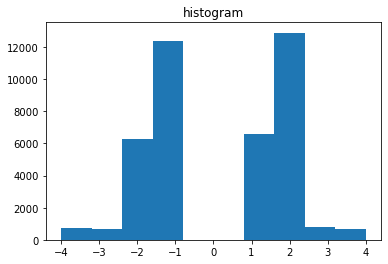

In [24]:
from matplotlib import pyplot as plt 
taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
taus_from_W_from_HNL =  (( ak.any((abs(taus.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( (taus.distinctParent.distinctParent.pdgId == 9900012), axis = -1)))
taus_from_HNL = ak.any((taus.distinctParent.pdgId == 9900012), axis = -1)
taus_from_W_from_q =  (( ak.any((abs(taus.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( abs((taus.distinctParent.distinctParent.pdgId) <=6), axis = -1)))
taus_from_W = ( ak.any((abs(taus.distinctParent.pdgId) == 24), axis = -1))
taus_from_from_q =  ( ( ak.any( abs((taus.distinctParent.distinctParent.pdgId) <=6), axis = -1)))


print("number of taus = "+str(len(ak.flatten(taus))))
print("number of taus from HNL = "+str(ak.count_nonzero(taus_from_HNL)))
print("number of taus from W = "+str(ak.count_nonzero(taus_from_W)))
print("number of taus from W from q = "+str(ak.count_nonzero(taus_from_W_from_q)))

parent_taus = taus.distinctParent.pdgId[abs(taus.distinctParent.pdgId) <7 ]
#parent_taus_from_HNL = taus_from_HNL.distinctParent.pdgId
print(parent_taus)
a = (ak.flatten(parent_taus))
print(len(a))
print(a)
plt.hist(a) 
plt.title("histogram") 
plt.show()



In [36]:
print(len(events))
HNL = events.GenPart[(np.abs(events.GenPart.pdgId) == 9900012)]
print(HNL)
HNL_0 = ak.num(HNL)== 0
HNL_1 =  ak.num(HNL)== 1
HNL_2 =  ak.num(HNL)== 2
print(ak.count_nonzero(HNL_0))
print(ak.count_nonzero(HNL_1))
print(ak.count_nonzero(HNL_2))
HNL_parent = HNL.distinctParent.pdgId
print(HNL_parent)



17337
[[GenParticle, GenParticle], [GenParticle, ... [GenParticle, GenParticle]]
0
0
17337
[[-1, -1], [-2, -2], [-2, -2], [2, 2], [2, ... [-1, -1], [-1, -1], [2, 2], [2, 2]]


In [4]:
t = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
print(t.distinctChildren.pdgId)


[[[], [22], [-16, 211], [], [-16, ... 22], [-16, 211, 211, -211], [16, 13, -14]]]


In [32]:
taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
taus_from_HNL = (ak.any(taus.distinctParent.pdgId == 9900012, axis = -1) )
taus_from_W_from_HNL =  ( ak.any( abs(taus.distinctParent.pdgId) ==24, axis = -1))
taus_from_W_from_q =  ( ak.any( abs(taus.distinctParent.pdgId) <=6, axis = -1)) 


electrons = events.GenPart[(np.abs(events.GenPart.pdgId) == 11)]
electrons_from_HNL = (ak.any(electrons.distinctParent.pdgId == 9900012, axis = -1))
electrons_from_W_from_HNL = ( ak.any( abs(electrons.distinctParent.pdgId) ==24, axis = -1))
electrons_from_W_from_q =  ( ak.any( abs(electrons.distinctParent.pdgId) <=6, axis = -1)) 



muons = events.GenPart[(np.abs(events.GenPart.pdgId) == 13)]
muons_from_HNL = (ak.any(muons.distinctParent.pdgId == 9900012, axis = -1))
muons_from_W_from_HNL = ( ak.any( abs(muons.distinctParent.pdgId) ==24, axis = -1))
muons_from_W_from_q =  ( ak.any(abs(muons.distinctParent.pdgId) <=6, axis = -1) )

print(ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_q))
print(ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_q))
print(ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_q))
print(ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_q & muons_from_W_from_q))
print("----------------------------------")

print(ak.count_nonzero(muons_from_HNL))
print(ak.count_nonzero(muons))
print(ak.count_nonzero(muons_from_W_from_q))
print(ak.count_nonzero(muons_from_W_from_HNL))

print("----------------------------------")

print(ak.count_nonzero(taus_from_HNL))
print(ak.count_nonzero(taus))
print(ak.count_nonzero(taus_from_W_from_q))
print(ak.count_nonzero(taus_from_W_from_HNL))

print("----------------------------------")

print(ak.count_nonzero(electrons_from_HNL))
print(ak.count_nonzero(electrons))
print(ak.count_nonzero(electrons_from_W_from_q))
print(ak.count_nonzero(electrons_from_W_from_HNL))

10365
6
9
6
----------------------------------
0
189565
9
5947
----------------------------------
15545
971443
16907
3756
----------------------------------
0
551371
10644
5847


In [68]:
#TEST what happens taus and electrons from q at the same time
taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
taus_from_W_from_q =  taus.distinctParent[( (abs(taus.distinctParent.pdgId) <=6))] 
taus_from_W_from_q_to_HNL =  taus.distinctParent[( (abs(taus.distinctParent.pdgId) <=6) & ak.any(abs(taus.distinctParent.distinctChildren.pdgId) == 9900012))] 


n_taus_from_W_from_q =  ( (abs(taus.distinctParent.pdgId) <=6))
n_taus_from_W_from_q_to_HNL =  ( (abs(taus.distinctParent.pdgId) <=6) & ak.any(abs(taus.distinctParent.distinctChildren.pdgId) == 9900012)) 

electrons = events.GenPart[(np.abs(events.GenPart.pdgId) == 11)]
electrons_from_W_from_q =  electrons.distinctParent[( (abs(electrons.distinctParent.pdgId) <=6))] 
electrons_from_W_from_q_to_HNL =  electrons.distinctParent[( (abs(electrons.distinctParent.pdgId) <=6) & ak.any(abs(electrons.distinctParent.distinctChildren.pdgId) == 9900012))] 


n_electrons_from_W_from_q =  ( (abs(electrons.distinctParent.pdgId) <=6))
n_electrons_from_W_from_q_to_HNL =  ( (abs(electrons.distinctParent.pdgId) <=6) & ak.any(abs(electrons.distinctParent.distinctChildren.pdgId) == 9900012)) 



print(taus_from_W_from_q.distinctChildren.pdgId)
print(taus_from_W_from_q_to_HNL.distinctChildren.pdgId)
print(ak.count_nonzero((taus_from_W_from_q_to_HNL)))
print(ak.count_nonzero((taus_from_W_from_q)))

print(ak.count_nonzero((n_taus_from_W_from_q_to_HNL)))
print(ak.count_nonzero((n_taus_from_W_from_q)))

print("-----------------")
print(electrons_from_W_from_q.distinctChildren.pdgId)
print(electrons_from_W_from_q_to_HNL.distinctChildren.pdgId)
print(ak.count_nonzero((electrons_from_W_from_q_to_HNL)))
print(ak.count_nonzero((electrons_from_W_from_q)))

print(ak.count_nonzero((n_electrons_from_W_from_q_to_HNL)))
print(ak.count_nonzero((n_electrons_from_W_from_q)))




[[[-15, 9900012, -15, -15, 9900012], [-15, ... [-15, 9900012, -15, -15, 9900012]]]
[[[-15, 9900012, -15, -15, 9900012], [-15, ... [-15, 9900012, -15, -15, 9900012]]]
595369
595369
40890
40890
-----------------
[[[-433, 11, -11], [-433, 11, -11], [11, -11], ... [], [[11, -11], [11, -11]], []]
[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
0
520232
0
36806
-----------------
[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
0
662
0
38


In [60]:
taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
taus_from_HNL = (ak.any(taus.distinctParent.pdgId == 9900012, axis = -1) )
taus_from_W_from_HNL =  ( ak.any( abs(taus.distinctParent.pdgId) ==24, axis = -1))
taus_from_W_from_q =  ( ak.any( abs(taus.distinctParent.pdgId) <=6, axis = -1)& ak.any(abs(taus.distinctParent.distinctChildren.pdgId) == 9900012)) 
taus_from_W_from_q_to_HNL =  ( (abs(taus.distinctParent.pdgId) <=6) & ak.any(abs(taus.distinctParent.distinctChildren.pdgId) == 9900012))


electrons = events.GenPart[(np.abs(events.GenPart.pdgId) == 11)]
electrons_from_HNL = (ak.any(electrons.distinctParent.pdgId == 9900012, axis = -1))
electrons_from_W_from_HNL = ( ak.any( abs(electrons.distinctParent.pdgId) ==24, axis = -1))
electrons_from_W_from_q =  ( ak.any( abs(electrons.distinctParent.pdgId) <=6, axis = -1)& ak.any(abs(taus.distinctParent.distinctChildren.pdgId) == 9900012)) 



muons = events.GenPart[(np.abs(events.GenPart.pdgId) == 13)]
muons_from_HNL = (ak.any(muons.distinctParent.pdgId == 9900012, axis = -1))
muons_from_W_from_HNL = ( ak.any( abs(muons.distinctParent.pdgId) ==24, axis = -1))
muons_from_W_from_q =  ( ak.any(abs(muons.distinctParent.pdgId) <=6, axis = -1) & ak.any(abs(taus.distinctParent.distinctChildren.pdgId) == 9900012))


print(ak.count_nonzero((taus_from_W_from_q_to_HNL)))
print(ak.count_nonzero((taus_from_W_from_q)))


40890
16907


[[9900012, 9900012], [9900012, 9900012, 9900012, ... [9900012], [9900012, 9900012]]
[[9900012, 9900012], [9900012, 9900012, 9900012, ... [9900012], [9900012, 9900012]]

28058
28058
[9900012, 9900012, 9900012, 9900012, 9900012, ... 9900012, 9900012, 9900012, 9900012]


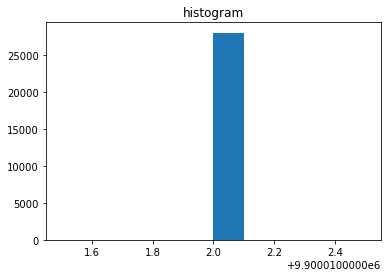

In [42]:
W = events.GenPart[(np.abs(events.GenPart.pdgId) == 24)]
W_parent = W.distinctParent.pdgId
W_from_HNL = W.distinctParent.pdgId[W.distinctParent.pdgId == 9900012]
print(W_from_HNL)
print(W_parent)
print()
b = ak.flatten(W_from_HNL)
a = (ak.flatten(W_parent))
print(len(a))
print(len(b))
print(a)
plt.hist(a) 
plt.title("histogram") 
plt.show()



In [36]:
taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
#taus_from_W_from_HNL =  (( ak.any((abs(taus.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( (taus.distinctParent.distinctParent.pdgId == 9900012), axis = -1)))
#taus_from_HNL = ak.any((taus.distinctParent.pdgId == 9900012), axis = -1)
#taus_from_W_from_q =  (( ak.any((abs(taus.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( abs((taus.distinctParent.distinctParent.pdgId) <=6), axis = -1)))

taus_from_HNL = (ak.any((taus.distinctParent.pdgId == 9900012), axis = -1) & ak.any((taus.distinctParent.distinctParent.distinctParent.pdgId <=6), axis = -1) )
taus_from_W_from_HNL =  ( ( ak.any( (taus.distinctParent.distinctParent.pdgId == 9900012), axis = -1))& ( ak.any( abs((taus.distinctParent.distinctParent.distinctParent.distinctParent.pdgId) <=6), axis = -1)))
taus_from_W_from_q =  ( ak.any( abs((taus.distinctParent.distinctParent.pdgId) <=6), axis = -1)) 


electrons = events.GenPart[(np.abs(events.GenPart.pdgId) == 11)]
#electrons_from_W_from_HNL =  (( ak.any((abs(electrons.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( (electrons.distinctParent.distinctParent.pdgId == 9900012), axis = -1)))
#electrons_from_HNL = ak.any((electrons.distinctParent.pdgId == 9900012), axis = -1)
#electrons_from_W_from_q =  (( ak.any((abs(electrons.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( abs((electrons.distinctParent.distinctParent.pdgId) <=6), axis = -1)))

electrons_from_HNL = (ak.any((electrons.distinctParent.pdgId == 9900012), axis = -1) & ak.any((electrons.distinctParent.distinctParent.distinctParent.pdgId <=6), axis = -1) )
electrons_from_W_from_HNL =  ( ( ak.any( (electrons.distinctParent.distinctParent.pdgId == 9900012), axis = -1))&( ak.any( abs((electrons.distinctParent.distinctParent.distinctParent.distinctParent.pdgId) <=6), axis = -1)))
electrons_from_W_from_q =  ( ak.any( abs((electrons.distinctParent.distinctParent.pdgId) <=6), axis = -1)) 



muons = events.GenPart[(np.abs(events.GenPart.pdgId) == 13)]
#muons_from_W_from_HNL =  (( ak.any((abs(muons.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( (muons.distinctParent.distinctParent.pdgId == 9900012), axis = -1)))
#muons_from_HNL = ak.any((muons.distinctParent.pdgId == 9900012), axis = -1)
#muons_from_W_from_q =  (( ak.any((abs(muons.distinctParent.pdgId) == 24), axis = -1)) & ( ak.any( abs((muons.distinctParent.distinctParent.pdgId) <=6), axis = -1)))

#muons_from_W_from_q =  ( ( ak.any( abs((muons.distinctParent.distinctParent.pdgId) <=6), axis = -1)))
#muons_from_W_from_HNL =  ( ( ak.any( (muons.distinctParent.distinctParent.pdgId == 9900012), axis = -1)))
muons_from_HNL = (ak.any((muons.distinctParent.pdgId == 9900012), axis = -1) & ak.any((muons.distinctParent.distinctParent.distinctParent.pdgId <=6), axis = -1) )
muons_from_W_from_HNL =  ( ( ak.any( (muons.distinctParent.distinctParent.pdgId == 9900012), axis = -1))&( ak.any( abs((muons.distinctParent.distinctParent.distinctParent.distinctParent.pdgId) <=6), axis = -1)))
muons_from_W_from_q =  ( ak.any( abs((muons.distinctParent.distinctParent.pdgId) <=6), axis = -1)) 


ttt = ak.count_nonzero(taus_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL)
tte =  ak.count_nonzero(taus_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL)
ttm =  ak.count_nonzero(taus_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL)


tet =  ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL)
tee =  ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL)
tem =  ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL)

tmt =  ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL)
tme =  ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL)
tmm =  ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL)

ett =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL)
ete =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL)
etm =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL)


eet =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL)
eee =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL)
eem =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL)

emt =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL)
eme =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL)
emm =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL)




mtt =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL)
mte =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL)
mtm =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL)


met =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL)
mee =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL)
mem =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL)

mmt =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL)
mme =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL)
mmm =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL)


total = len(muons_from_HNL)
t3 = ttt
t2e1 = tte + tet + ett
t2m1 = ttm + tmt + mtt
t1e1m1 = tme + tem + met + mte + etm + emt

e3 = eee
e2t1 = eet + ete + tee
e2m1 = eem = eme + mee

m3 = mmm
m2t1 = mmt + mtm + tmm
m2e1 = mme + mem + emm
total_res = m3 + t3 + e3 + m2t1 + m2e1 + t2e1 + t2m1 + e2m1 + e2t1 + t1e1m1

print("t3 = " + str(t3)+"/"+str(total)+" = "+ str(t3/total)+" ----->" + str(100*t3/total))
print("e3 = " + str(e3)+"/"+str(total)+" = "+ str(e3/total)+" ----->" + str(100*e3/total))
print("m3 = " + str(m3)+"/"+str(total)+" = "+ str(m3/total)+" ----->" + str(100*m3/total))
print("t2e1 = " + str(t2e1)+"/"+str(total)+" = "+ str(t2e1/total)+" ----->" + str(100*t2e1/total))
print("t2m1 = " + str(t2m1)+"/"+str(total)+" = "+ str(t2m1/total)+" ----->" + str(100*t2m1/total))
print("e2m1 = " + str(e2m1)+"/"+str(total)+" = "+ str(e2m1/total)+" ----->" + str(100*e2m1/total))
print("m2e1 = " + str(m2e1)+"/"+str(total)+" = "+ str(m2e1/total)+" ----->" + str(100*m2e1/total))
print("m2t1 = " + str(m2t1)+"/"+str(total)+" = "+ str(m2t1/total)+" ----->" + str(100*m2t1/total))
print("e2t1 = " + str(e2t1)+"/"+str(total)+" = "+ str(e2t1/total)+" ----->" + str(100*e2t1/total))
print("t1e1m1 = " + str(t1e1m1)+"/"+str(total)+" = "+ str(t1e1m1/total)+" ----->" + str(100*t1e1m1/total))
print("total = " + str(total_res)+"/"+str(total)+" = "+ str(total_res/total)+" ----->" + str(100*total_res/total))





ttt = ak.count_nonzero(taus_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL)
tte =  ak.count_nonzero(taus_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL)
ttm =  ak.count_nonzero(taus_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL)


tet =  ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL)
tee =  ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL)
tem =  ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL)

tmt =  ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL)
tme =  ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL)
tmm =  ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL)

ett =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL)
ete =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL)
etm =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL)


eet =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL)
eee =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL)
eem =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL)

emt =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL)
eme =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL)
emm =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL)




mtt =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL)
mte =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL)
mtm =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL)


met =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL)
mee =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL)
mem =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL)

mmt =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL)
mme =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL)
mmm =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL)

t3 = 1/17337 = 5.768010613139528e-05 ----->0.005768010613139528
e3 = 0/17337 = 0.0 ----->0.0
m3 = 0/17337 = 0.0 ----->0.0
t2e1 = 134/17337 = 0.0077291342216069675 ----->0.7729134221606968
t2m1 = 111/17337 = 0.006402491780584876 ----->0.6402491780584876
e2m1 = 0/17337 = 0.0 ----->0.0
m2e1 = 0/17337 = 0.0 ----->0.0
m2t1 = 56/17337 = 0.0032300859433581357 ----->0.3230085943358136
e2t1 = 69/17337 = 0.0039799273230662745 ----->0.39799273230662746
t1e1m1 = 15/17337 = 0.0008652015919709292 ----->0.08652015919709292
total = 386/17337 = 0.02226452096671858 ----->2.2264520966718577


In [87]:
fname = "data_1000_8.root"
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
events['Electron'] = events.Electron[(events.Electron.pt > 20.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
     
events['Muon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
           
        
muon1, electron1 = ak.unzip(ak.cartesian([events.Muon, events.Electron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
events['Muon'] = events.Muon[(~(match1))]    



events['Tau'] = events.Tau[(events.Tau.pt > 20.) & (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet > 0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.Tau, events.Electron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.Tau, events.Electron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
        
events['Tau'] = events.Tau[((~(match2) & ~(match3)) )]  
           

taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
taus_from_HNL = (ak.any(abs(taus.distinctParent.pdgId) == 9900012, axis = -1) )
taus_from_W_from_HNL =  ( ak.any( abs(taus.distinctParent.pdgId) ==24, axis = -1))
taus_from_W_from_q =  (( ak.any( abs(taus.distinctParent.pdgId) <=6, axis = -1) |ak.any( abs(taus.distinctParent.pdgId) ==21, axis = -1)  )& ak.any(abs(taus.distinctParent.distinctChildren.pdgId) == 9900012)) 


electrons = events.GenPart[(np.abs(events.GenPart.pdgId) == 11)]
electrons_from_HNL = (ak.any(abs(electrons.distinctParent.pdgId) == 9900012, axis = -1))
electrons_from_W_from_HNL = ( ak.any( abs(electrons.distinctParent.pdgId) ==24, axis = -1))
electrons_from_W_from_q =  (( ak.any( abs(electrons.distinctParent.pdgId) <=6, axis = -1) |ak.any( abs(electrons.distinctParent.pdgId) ==21, axis = -1)  )& ak.any(abs(electrons.distinctParent.distinctChildren.pdgId) == 9900012)) 



muons = events.GenPart[(np.abs(events.GenPart.pdgId) == 13)]
muons_from_HNL = (ak.any(abs(muons.distinctParent.pdgId) == 9900012, axis = -1))
muons_from_W_from_HNL = ( ak.any( abs(muons.distinctParent.pdgId) ==24, axis = -1))
muons_from_W_from_q =  (( ak.any( abs(muons.distinctParent.pdgId) <=6, axis = -1) |ak.any( abs(muons.distinctParent.pdgId) ==21, axis = -1)  )& ak.any(abs(muons.distinctParent.distinctChildren.pdgId) == 9900012)) 


HNL = events.GenPart[(np.abs(events.GenPart.pdgId) == 9900012)]
HNL_to_Z = ak.any(ak.any(abs(HNL.distinctChildren.pdgId) == 23, axis = -1), axis = -1)
Znu = ak.count_nonzero(HNL_to_Z)
print(Znu)


ttt = ak.count_nonzero(taus_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL)
tte =  ak.count_nonzero(taus_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL)
ttm =  ak.count_nonzero(taus_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL)


tet =  ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL)
tee =  ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL)
tem =  ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL)

tmt =  ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL)
tme =  ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL)
tmm =  ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL)

ett =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL)
ete =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL)
etm =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL)


eet =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL)
eee =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL)
eem =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL)

emt =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL)
eme =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL)
emm =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL)




mtt =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL)
mte =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL)
mtm =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL)


met =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL)
mee =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL)
mem =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL)

mmt =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL)
mme =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL)
mmm =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL)


total = len(events)
t3 = ttt
t2e1 = tte + tet + ett
t2m1 = ttm + tmt + mtt
t1e1m1 = tme + tem + met + mte + etm + emt

e3 = eee
e2t1 = eet + ete + tee
e2m1 = eem = eme + mee

m3 = mmm
m2t1 = mmt + mtm + tmm
m2e1 = mme + mem + emm
total_res = m3 + t3 + e3 + m2t1 + m2e1 + t2e1 + t2m1 + e2m1 + e2t1 + t1e1m1 + Znu

print("t3 = " + str(t3)+"/"+str(total)+" = "+ str(t3/total)+" ----->" + str(100*t3/total))
print("e3 = " + str(e3)+"/"+str(total)+" = "+ str(e3/total)+" ----->" + str(100*e3/total))
print("m3 = " + str(m3)+"/"+str(total)+" = "+ str(m3/total)+" ----->" + str(100*m3/total))
print("t2e1 = " + str(t2e1)+"/"+str(total)+" = "+ str(t2e1/total)+" ----->" + str(100*t2e1/total))
print("t2m1 = " + str(t2m1)+"/"+str(total)+" = "+ str(t2m1/total)+" ----->" + str(100*t2m1/total))
print("e2m1 = " + str(e2m1)+"/"+str(total)+" = "+ str(e2m1/total)+" ----->" + str(100*e2m1/total))
print("m2e1 = " + str(m2e1)+"/"+str(total)+" = "+ str(m2e1/total)+" ----->" + str(100*m2e1/total))
print("m2t1 = " + str(m2t1)+"/"+str(total)+" = "+ str(m2t1/total)+" ----->" + str(100*m2t1/total))
print("e2t1 = " + str(e2t1)+"/"+str(total)+" = "+ str(e2t1/total)+" ----->" + str(100*e2t1/total))
print("t1e1m1 = " + str(t1e1m1)+"/"+str(total)+" = "+ str(t1e1m1/total)+" ----->" + str(100*t1e1m1/total))
print("total = " + str(total_res)+"/"+str(total)+" = "+ str(total_res/total)+" ----->" + str(100*total_res/total))





ttt = taus_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL
tte =  taus_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL
ttm =  taus_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL


tet =  taus_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL
tee =  taus_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL
tem =  taus_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL

tmt =  taus_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL
tme =  taus_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL
tmm =  taus_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL


ett =  electrons_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL
ete =  electrons_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL
etm =  electrons_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL


eet =  electrons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL
eee =  electrons_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL
eem =  electrons_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL

emt = electrons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL
eme =  electrons_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL
emm =  electrons_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL




mtt =  muons_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL
mte =  muons_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL
mtm =  muons_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL


met =  muons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL
mee =  muons_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL
mem =  muons_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL

mmt =  muons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL
mme =  muons_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL
mmm =  muons_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL





FileNotFoundError: file not found

    'data_1000_8.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [89]:
if(True):
        taus = events.GenPart[(np.abs(events.GenPart.pdgId) == 15)]
        taus = taus[taus.hasFlags(['isLastCopy'])]
        counts = ak.num(taus)
        taus = ak.flatten(taus)
    
        taus_from_HNL = abs(taus.distinctParent.pdgId) == 9900012
        taus_from_W_from_HNL =  abs(taus.distinctParent.pdgId) ==24
        taus_from_W_from_q =  abs(taus.distinctParent.pdgId) <=6
        taus_from_W_from_g = abs(taus.distinctParent.pdgId) == 21
        taus_to_e = ak.any(abs(taus.distinctChildren.pdgId) == 11,axis = -1)
        taus_to_m = ak.any(abs(taus.distinctChildren.pdgId) == 13,axis = -1)
        taus_to_h = ak.any(abs(taus.distinctChildren.pdgId) > 40,axis = -1)
        print(taus_to_h)

        taus_from_HNL_to_e = taus_from_HNL & taus_to_e
        taus_from_HNL_to_e = ak.any(ak.unflatten(taus_from_HNL_to_e, counts), axis = -1)
        taus_from_HNL_to_mu = taus_from_HNL & taus_to_m
        taus_from_HNL_to_mu = ak.any(ak.unflatten(taus_from_HNL_to_mu, counts), axis = -1)
        taus_from_HNL_to_h = taus_from_HNL & taus_to_h
        taus_from_HNL_to_h = ak.any(ak.unflatten(taus_from_HNL_to_h, counts), axis = -1)
        taus_from_HNL = ak.any(ak.unflatten(taus_from_HNL, counts), axis = -1)
     
        taus_from_W_from_HNL_to_e = taus_from_W_from_HNL & taus_to_e
        taus_from_W_from_HNL_to_e = ak.any(ak.unflatten(taus_from_W_from_HNL_to_e, counts), axis = -1)
        taus_from_W_from_HNL_to_mu = taus_from_W_from_HNL & taus_to_m
        taus_from_W_from_HNL_to_mu = ak.any(ak.unflatten(taus_from_W_from_HNL_to_mu, counts), axis = -1)
        taus_from_W_from_HNL_to_h = taus_from_W_from_HNL & taus_to_h
        taus_from_W_from_HNL_to_h = ak.any(ak.unflatten(taus_from_W_from_HNL_to_h, counts), axis = -1)
        taus_from_W_from_HNL = ak.any(ak.unflatten(taus_from_W_from_HNL, counts), axis = -1)
     
        taus_from_W_from_q_to_e = taus_from_W_from_q & taus_to_e
        taus_from_W_from_q_to_e = ak.any(ak.unflatten(taus_from_W_from_q_to_e, counts), axis = -1)
        taus_from_W_from_q_to_mu = taus_from_W_from_q & taus_to_m
        taus_from_W_from_q_to_mu = ak.any(ak.unflatten(taus_from_W_from_q_to_mu, counts), axis = -1)
        taus_from_W_from_q_to_h = taus_from_W_from_q & taus_to_h
        taus_from_W_from_q_to_h = ak.any(ak.unflatten(taus_from_W_from_q_to_h, counts), axis = -1)
        taus_from_W_from_q = ak.any(ak.unflatten(taus_from_W_from_q, counts), axis = -1)

        taus_from_W_from_g_to_e = taus_from_W_from_g & taus_to_e
        taus_from_W_from_g_to_e = ak.any(ak.unflatten(taus_from_W_from_g_to_e, counts), axis = -1)
        taus_from_W_from_g_to_mu = taus_from_W_from_g & taus_to_m
        taus_from_W_from_g_to_mu = ak.any(ak.unflatten(taus_from_W_from_g_to_mu, counts), axis = -1)
        taus_from_W_from_g_to_h = taus_from_W_from_g & taus_to_h
        taus_from_W_from_g_to_h = ak.any(ak.unflatten(taus_from_W_from_g_to_h, counts), axis = -1)
        taus_from_W_from_g = ak.any(ak.unflatten(taus_from_W_from_g, counts), axis = -1)

        electrons = events.GenPart[(np.abs(events.GenPart.pdgId) == 11)]
        electrons = electrons[electrons.hasFlags(['isLastCopy'])]
        electrons_from_HNL = (ak.any(abs(electrons.distinctParent.pdgId) == 9900012, axis = -1))
        electrons_from_W_from_HNL = ( ak.any( abs(electrons.distinctParent.pdgId) ==24, axis = -1))
        electrons_from_W_from_q =  (( ak.any( abs(electrons.distinctParent.pdgId) <=6, axis = -1) |ak.any( abs(electrons.distinctParent.pdgId) ==21, axis = -1)  )& ak.any(abs(electrons.distinctParent.distinctChildren.pdgId) == 9900012)) 



        muons = events.GenPart[(np.abs(events.GenPart.pdgId) == 13)]
        muons = muons[muons.hasFlags(['isLastCopy'])]
        muons_from_HNL = (ak.any(abs(muons.distinctParent.pdgId) == 9900012, axis = -1))
        muons_from_W_from_HNL = ( ak.any( abs(muons.distinctParent.pdgId) ==24, axis = -1))
        muons_from_W_from_q =  (( ak.any( abs(muons.distinctParent.pdgId) <=6, axis = -1) |ak.any( abs(muons.distinctParent.pdgId) ==21, axis = -1)  )& ak.any(abs(muons.distinctParent.distinctChildren.pdgId) == 9900012)) 

        HNL = events.GenPart[(np.abs(events.GenPart.pdgId) == 9900012)]
        HNL = HNL[HNL.hasFlags(['isLastCopy'])]

        HNL_to_Z = ak.any(ak.any(abs(HNL.distinctChildren.pdgId) == 23, axis = -1), axis = -1)
        Znu = ak.count_nonzero(HNL_to_Z)

        #ttt = ak.count_nonzero(taus_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL)
        tetete = ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_e & taus_from_HNL_to_e)
        tetetm = ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_e & taus_from_HNL_to_mu)
        teteth = ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_e & taus_from_HNL_to_h)

        tetmte = ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_e)
        tetmtm = ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_mu)
        tetmth = ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_h)

        tethte = ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_h & taus_from_HNL_to_e)
        tethtm = ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_h & taus_from_HNL_to_mu)
        tethth = ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_h & taus_from_HNL_to_h)
###############
        tmtete = ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_e & taus_from_HNL_to_e)
        tmtetm = ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_e & taus_from_HNL_to_mu)
        tmteth = ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_e & taus_from_HNL_to_h)

        tmtmte = ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_e)
        tmtmtm = ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_mu)
        tmtmth = ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_h)

        tmthte = ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_h & taus_from_HNL_to_e)
        tmthtm = ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_h & taus_from_HNL_to_mu)
        tmthth = ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_h & taus_from_HNL_to_h)

###############
        thtete = ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_e & taus_from_HNL_to_e)
        thtetm = ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_e & taus_from_HNL_to_mu)
        thteth = ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_e & taus_from_HNL_to_h)

        thtmte = ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_e)
        thtmtm = ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_mu)
        thtmth = ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_h)

        ththte = ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_h & taus_from_HNL_to_e)
        ththtm = ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_h & taus_from_HNL_to_mu)
        ththth = ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_h & taus_from_HNL_to_h)
###########################

        #tte =  ak.count_nonzero(taus_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL)
        tetee =  ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_e & electrons_from_HNL)
        tetme =  ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_mu & electrons_from_HNL)
        tethe =  ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_h & electrons_from_HNL)
    ####
        tmtee =  ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_e & electrons_from_HNL)
        tmtme =  ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_mu & electrons_from_HNL)
        tmthe =  ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_h & electrons_from_HNL)
        ####
        thtee =  ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_e & electrons_from_HNL)
        thtme =  ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_mu & electrons_from_HNL)
        ththe =  ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_h & electrons_from_HNL)

###############################

        #ttm =  ak.count_nonzero(taus_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL)
        tetem =  ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_e & muons_from_HNL)
        tethm =  ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_h & muons_from_HNL)
        tetmm =  ak.count_nonzero(taus_from_W_from_q_to_e & taus_from_W_from_HNL_to_mu & muons_from_HNL)
############
        tmtem =  ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_e & muons_from_HNL)
        tmthm =  ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_h & muons_from_HNL)
        tmtmm =  ak.count_nonzero(taus_from_W_from_q_to_mu & taus_from_W_from_HNL_to_mu & muons_from_HNL)
###########
        thtem =  ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_e & muons_from_HNL)
        ththm =  ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_h & muons_from_HNL)
        thtmm =  ak.count_nonzero(taus_from_W_from_q_to_h & taus_from_W_from_HNL_to_mu & muons_from_HNL)
##############3

        #tet =  ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL)
        teete =  ak.count_nonzero(taus_from_W_from_q_to_e & electrons_from_W_from_HNL & taus_from_HNL_to_e)
        teetm =  ak.count_nonzero(taus_from_W_from_q_to_e & electrons_from_W_from_HNL & taus_from_HNL_to_mu)
        teeth =  ak.count_nonzero(taus_from_W_from_q_to_e & electrons_from_W_from_HNL & taus_from_HNL_to_h)
        #################
        tmete =  ak.count_nonzero(taus_from_W_from_q_to_mu & electrons_from_W_from_HNL & taus_from_HNL_to_e)
        tmetm =  ak.count_nonzero(taus_from_W_from_q_to_mu & electrons_from_W_from_HNL & taus_from_HNL_to_mu)
        tmeth =  ak.count_nonzero(taus_from_W_from_q_to_mu & electrons_from_W_from_HNL & taus_from_HNL_to_h)
        #################
        thete =  ak.count_nonzero(taus_from_W_from_q_to_h & electrons_from_W_from_HNL & taus_from_HNL_to_e)
        thetm =  ak.count_nonzero(taus_from_W_from_q_to_h & electrons_from_W_from_HNL & taus_from_HNL_to_mu)
        theth =  ak.count_nonzero(taus_from_W_from_q_to_h & electrons_from_W_from_HNL & taus_from_HNL_to_h)
        #################
#################################

        #tee =  ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL)
        teee =  ak.count_nonzero(taus_from_W_from_q_to_e & electrons_from_W_from_HNL & electrons_from_HNL)
        tmee =  ak.count_nonzero(taus_from_W_from_q_to_mu & electrons_from_W_from_HNL & electrons_from_HNL)
        thee =  ak.count_nonzero(taus_from_W_from_q_to_h & electrons_from_W_from_HNL & electrons_from_HNL)
#######################

        #tem =  ak.count_nonzero(taus_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL)
        teem =  ak.count_nonzero(taus_from_W_from_q_to_e & electrons_from_W_from_HNL & muons_from_HNL)
        tmem =  ak.count_nonzero(taus_from_W_from_q_to_mu & electrons_from_W_from_HNL & muons_from_HNL)
        them =  ak.count_nonzero(taus_from_W_from_q_to_h & electrons_from_W_from_HNL & muons_from_HNL)
 ##################
        #tmt =  ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL)
        temte =  ak.count_nonzero(taus_from_W_from_q_to_e & muons_from_W_from_HNL & taus_from_HNL_to_e)
        temtm =  ak.count_nonzero(taus_from_W_from_q_to_e & muons_from_W_from_HNL & taus_from_HNL_to_mu)
        temth =  ak.count_nonzero(taus_from_W_from_q_to_e & muons_from_W_from_HNL & taus_from_HNL_to_h)
############################3
        tmmte =  ak.count_nonzero(taus_from_W_from_q_to_mu & muons_from_W_from_HNL & taus_from_HNL_to_e)
        tmmtm =  ak.count_nonzero(taus_from_W_from_q_to_mu & muons_from_W_from_HNL & taus_from_HNL_to_mu)
        tmmth =  ak.count_nonzero(taus_from_W_from_q_to_mu & muons_from_W_from_HNL & taus_from_HNL_to_h)
############################3

        thmte =  ak.count_nonzero(taus_from_W_from_q_to_h& muons_from_W_from_HNL & taus_from_HNL_to_e)
        thmtm =  ak.count_nonzero(taus_from_W_from_q_to_h & muons_from_W_from_HNL & taus_from_HNL_to_mu)
        thmth =  ak.count_nonzero(taus_from_W_from_q_to_h & muons_from_W_from_HNL & taus_from_HNL_to_h)
############################3

        #tme =  ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL)
        teme =  ak.count_nonzero(taus_from_W_from_q_to_e & muons_from_W_from_HNL & electrons_from_HNL)
        tmme =  ak.count_nonzero(taus_from_W_from_q_to_mu & muons_from_W_from_HNL & electrons_from_HNL)
        thme =  ak.count_nonzero(taus_from_W_from_q_to_h & muons_from_W_from_HNL & electrons_from_HNL)
####################################
        #tmm =  ak.count_nonzero(taus_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL)
        temm =  ak.count_nonzero(taus_from_W_from_q_to_e & muons_from_W_from_HNL & muons_from_HNL)
        tmmm =  ak.count_nonzero(taus_from_W_from_q_to_mu & muons_from_W_from_HNL & muons_from_HNL)
        thmm =  ak.count_nonzero(taus_from_W_from_q_to_h & muons_from_W_from_HNL & muons_from_HNL)
################################
        #ett =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL)
        etete =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_e & taus_from_HNL_to_e)
        etetm =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_e & taus_from_HNL_to_mu)
        eteth =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_e & taus_from_HNL_to_h)
################
        etmte =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_e)
        etmtm =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_mu)
        etmth =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_h)
################
        ethte =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_h & taus_from_HNL_to_e)
        ethtm =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_h & taus_from_HNL_to_mu)
        ethth =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_h & taus_from_HNL_to_h)
################
        #ete =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL)
        etee =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_e & electrons_from_HNL)
        etme =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_mu & electrons_from_HNL)
        ethe =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_h & electrons_from_HNL)

######################33
        #etm =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL)
        etem =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_e & muons_from_HNL)
        etmm =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_mu & muons_from_HNL)
        ethm =  ak.count_nonzero(electrons_from_W_from_q & taus_from_W_from_HNL_to_h & muons_from_HNL)
##############################

        #eet =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL)
        eete =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL_to_e)
        eetm =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL_to_mu)
        eeth =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL_to_h)

        ##########################
        eee =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL)
        eem =  ak.count_nonzero(electrons_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL)
######################33
        #emt =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL)
        emte =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL_to_e)
        emtm =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL_to_mu)
        emth =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL_to_h)

         ##################33
        eme =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL)
        emm =  ak.count_nonzero(electrons_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL)



#########################
        #mtt =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL & taus_from_HNL)
        mtete =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_e & taus_from_HNL_to_e)
        mtetm =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_e & taus_from_HNL_to_mu)
        mteth =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_e & taus_from_HNL_to_h)
        #################3
        mtmte =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_e)
        mtmtm =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_mu)
        mtmth =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_mu & taus_from_HNL_to_h)

        #################3
        mthte =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_h & taus_from_HNL_to_e)
        mthtm =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_h & taus_from_HNL_to_mu)
        mthth =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_h & taus_from_HNL_to_h)

        #################3



        #mte =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL & electrons_from_HNL)
        mtee =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_e & electrons_from_HNL)
        mtme =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_mu & electrons_from_HNL)
        mthe =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_h & electrons_from_HNL)

        ##########################
        #mtm =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL & muons_from_HNL)
        mtem =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_e & muons_from_HNL)
        mtmm =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_mu & muons_from_HNL)
        mthm =  ak.count_nonzero(muons_from_W_from_q & taus_from_W_from_HNL_to_h & muons_from_HNL)

        ####################3


        #met =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL)
        mete =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL_to_e)
        metm =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL_to_mu)
        meth =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & taus_from_HNL_to_h)

        ##################3
        mee =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & electrons_from_HNL)
        mem =  ak.count_nonzero(muons_from_W_from_q & electrons_from_W_from_HNL & muons_from_HNL)
####################3
        #mmt =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL)
        mmte =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL_to_e)
        mmtm =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL_to_mu)
        mmth =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & taus_from_HNL_to_h)
        ####################3
        mme =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & electrons_from_HNL)
        mmm =  ak.count_nonzero(muons_from_W_from_q & muons_from_W_from_HNL & muons_from_HNL)


        total = len(events) - Znu
        h3 = ththth
        h2e1 = tethth + thteth + ththe + theth + ethth  +ththte 
        h2m1 = tmthth + ththm + thmth + mthth +ththtm +thtmth
        m2h1 = tmtmth + tmthtm + thtmtm + thmm + mthm + mmth + mthtm + mtmth + tmmth +thtmm + tmthm + thmtm
        e2h1= tethte + teteth + thtete + thee + ethe + eeth + ethte + eteth + thete + teeth + thtee +tethe
        h1m1e1 = tetmth + tethtm + tmteth + tmthte + thtetm + thtmte + tmthe + tethm + thtme + thtem + them + thme + ethm + mthe + meth + emth + mthte + mteth + ethtm + etmth + thmte + temth + thetm + tmeth

        e3 =eee + tetete + eete + etee + etete + teee + teete +tetee
        e2m1 = tetmte + tetetm + tmtete + tetme + tmtee + teetm + eem + eme + mee + teem + etem +tetem +mete + mtee + mtete + emte + eetm + etme + etmte + etetm + teme + temte + tmee + tmete
        m2e1 = tetmtm + tmtetm + tmtmte + tmtme + tetmm + tmem + emm + mem + mme + mmte + metm + mtem + mtme + mtmte + mtetm + emtm + etmm + etmtm + temm + tmme + tmmte + temtm + tmtem + tmetm
        m3 = tmtmtm + mmm + mmtm + mtmm + mtmtm + tmmm + tmmtm + tmtmm


        # t3 = ttt
        # t2e1 = tte + tet + ett
        # t2m1 = ttm + tmt + mtt
        # t1e1m1 = tme + tem + met + mte + etm + emt

        # e3 = eee
        # e2t1 = eet + ete + tee
        # e2m1 = eem = eme + mee

        # m3 = mmm
        # m2t1 = mmt + mtm + tmm
        # m2e1 = mme + mem + emm
        total_res = m3 + h3 + e3 + m2h1+ m2e1 + h2e1 + h2m1 + e2m1 + e2h1 + h1m1e1



        taus_to_e = ak.count_nonzero(ak.any(abs(taus.distinctChildren.pdgId) == 11, axis = -1))
        taus_to_m = ak.count_nonzero(ak.any(abs(taus.distinctChildren.pdgId) == 13, axis = -1))
        taus_to_h = ak.count_nonzero(ak.any(abs(taus.distinctChildren.pdgId) >40, axis = -1))
        taus_to_q = ak.count_nonzero(ak.any(abs(taus.distinctChildren.pdgId) <=6, axis = -1))

        total_decay_tau = taus_to_e  + taus_to_h + taus_to_m + taus_to_q
   


        nameoftxt = 'C:\\Users\\lucas\\Desktop\\PDM\\analysis\\ratio.txt' 
        ds = "boby"
        with open(nameoftxt, 'w') as f:
            f.write("for " + str(ds) + ", ratio are : \n")
            f.write("h3 = " + str(h3)+"/"+str(total)+" = "+ str(h3/total)+" ----->" + str(100*h3/total) + "%\n")
            f.write("e3 = " + str(e3)+"/"+str(total)+" = "+ str(e3/total)+" ----->" + str(100*e3/total)+ "%\n")
            f.write("m3 = " + str(m3)+"/"+str(total)+" = "+ str(m3/total)+" ----->" + str(100*m3/total)+ "%\n")
            f.write("h2e1 = " + str(h2e1)+"/"+str(total)+" = "+ str(h2e1/total)+" ----->" + str(100*h2e1/total)+ "%\n")
            f.write("h2m1 = " + str(h2m1)+"/"+str(total)+" = "+ str(h2m1/total)+" ----->" + str(100*h2m1/total)+ "%\n")
            f.write("e2m1 = " + str(e2m1)+"/"+str(total)+" = "+ str(e2m1/total)+" ----->" + str(100*e2m1/total)+ "%\n")
            f.write("m2e1 = " + str(m2e1)+"/"+str(total)+" = "+ str(m2e1/total)+" ----->" + str(100*m2e1/total)+ "%\n")
            f.write("m2h1 = " + str(m2h1)+"/"+str(total)+" = "+ str(m2h1/total)+" ----->" + str(100*m2h1/total)+ "%\n")
            f.write("e2h1 = " + str(e2h1)+"/"+str(total)+" = "+ str(e2h1/total)+" ----->" + str(100*e2h1/total)+ "%\n")
            f.write("h1e1m1 = " + str(h1m1e1)+"/"+str(total)+" = "+ str(h1m1e1/total)+" ----->" + str(100*h1m1e1/total)+ "%\n")
            f.write("total = " + str(total_res)+"/"+str(total)+" = "+ str(total_res/total)+" ----->" + str(100*total_res/total)+ "%\n")
            f.write("\n")
            f.write("---------------------------------------------------------------------------------\n")
            f.write("\n")
            f.write("tau to muons = " + str(taus_to_m)+"/"+str(total_decay_tau) + " ----> " +str(100*taus_to_m/total_decay_tau)+"%\n")
            f.write("tau to electrons = " + str(taus_to_e)+"/"+str(total_decay_tau) + " ----> " +str(100*taus_to_e/total_decay_tau)+"%\n")
            f.write("tau to hadrons = " + str(taus_to_h + taus_to_q)+"/"+str(total_decay_tau) + " ----> " +str(100*(taus_to_h + taus_to_q)/total_decay_tau)+"%\n")
            f.write("\n")
            f.write("---------------------------------------------------------------------------------\n")
            f.write("\n")

In [177]:
ev = events.GenPart[~HNL_to_Z & ~ttt & ~tte  &~ttm  & ~tet  &~tee & ~tem  &~tmt  &~tme  &~tmm & ~ett & ~ete  &~etm  & ~eet  &~eee & ~eem  &~emt  &~eme  &~emm  &~mtt & ~mte  &~mtm  & ~met  &~mee & ~mem  &~mmt  &~mme  &~mmm  ]
#ev = events.GenPart[ ~ttt ]

print(len(ev))
HNL = ev[(np.abs(ev.pdgId) == 9900012)]
print(len(HNL))
print("xxxxxxxxxxxxxxxxxxxxxxxx")

children_HNL_from_g = HNL.distinctParent.distinctChildren.pdgId
print(children_HNL_from_g)
print("xxxxxxxxxxxxxxxxxxxxxxxx")

#print(HNL)
#print(HNL.distinctChildren.pdgId)
HNL_to_tau = ak.any(ak.any(abs(HNL.distinctChildren.pdgId) == 15, axis = -1), axis = -1)
print(len(HNL_to_tau))


missed = events[HNL_to_tau]
muons = missed.GenPart[(np.abs(missed.GenPart.pdgId) == 13)]
muons_from_HNL = (ak.any(muons.distinctParent.pdgId == 9900012, axis = -1))
muons_from_W_from_HNL = ( ak.any( abs(muons.distinctParent.pdgId) ==24, axis = -1))
muons_from_W_from_q =  ( ak.any(abs(muons.distinctParent.pdgId) <=6, axis = -1) & ak.any(abs(muons.distinctParent.distinctChildren.pdgId) == 9900012))
print(ak.count_nonzero(muons_from_W_from_HNL))
print(ak.count_nonzero(muons_from_W_from_q))




electrons = missed.GenPart[(np.abs(missed.GenPart.pdgId) == 11)]
electrons_from_HNL = (ak.any(electrons.distinctParent.pdgId == 9900012, axis = -1))
electrons_from_W_from_HNL = ( ak.any( abs(electrons.distinctParent.pdgId) ==24, axis = -1))
electrons_from_W_from_q =  ( ak.any( abs(electrons.distinctParent.pdgId) <=6, axis = -1)& ak.any(abs(electrons.distinctParent.distinctChildren.pdgId) == 9900012)) 
print(ak.count_nonzero(electrons_from_W_from_HNL))
print(ak.count_nonzero(electrons_from_W_from_q))



taus = missed.GenPart[(np.abs(missed.GenPart.pdgId) == 15)]
taus_from_HNL = (ak.any(taus.distinctParent.pdgId == 9900012, axis = -1) )
taus_from_W_from_HNL =  ( ak.any( abs(taus.distinctParent.pdgId) ==24, axis = -1))
taus_from_W_from_q =  ( ak.any( abs(taus.distinctParent.pdgId) <=6, axis = -1)& ak.any(abs(taus.distinctParent.distinctChildren.pdgId) == 9900012)) 
print(ak.count_nonzero(taus_from_W_from_HNL))
print(ak.count_nonzero(taus_from_W_from_q))
print(ak.count_nonzero(taus_from_W_from_HNL & taus_from_W_from_q & taus_from_HNL))





9
9
xxxxxxxxxxxxxxxxxxxxxxxx
[[[-15, 9900012, 1, -15, 9900012, 1], ... [-15, 9900012, 1, 1, -15, 9900012, 1]]]
xxxxxxxxxxxxxxxxxxxxxxxx
9
2
0
3
0
2
9
2


In [106]:
tag = "boby"
ds = "b"

nameoftxt = "ratio"+str(tag) +".txt" 
with open(nameoftxt, 'a') as f:
    f.write("for " + str(ds) + ", ratio are : ")
    f.write("BLBLA")
    f.write("\n")

In [ ]:
print(test)